In [7]:
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from tqdm import tqdm

import matplotlib.pyplot as plt
from QuantumReservoirpy.Reservoir import QReservoir
from QuantumReservoirpy import Layers

from QuantumReservoirpy.Experiment import Experiment


In [16]:
SHOTS=2000
reservoirs = []
timeseries = np.array(([0, 1, 1, 2] * 2 + [0, 1, 1, 3] * 2) * 10)
for i in range(6):
    best = 0
    while True:
        res =  QReservoir(qubits=3, layers=[
                Layers.H(1),
                Layers.Warmup(5),
                Layers.Timeseries(measure_qubits=np.arange(2), timeseries_qubits=[0, 1], distance=0),
                Layers.Predict(num_predictions=25)
        ])

        model = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='linear'))
        expr = Experiment(reservoir=res, model=model)
        expr.run(timeseries, shots=SHOTS, warmup=25)
        score = expr.get_score()
        if score > best:
            best = score
            print(f'{i}: {score}')
    
        if score >= 0.9:
            break
        
    reservoirs.append(res)
# circ = reservoir1.circuit(timeseries=[1, 2]* 3)
# circ.draw('mpl')
# plt.show()

0: 0.7555555555555555
0: 0.8222222222222222
0: 0.8666666666666667
0: 0.8888888888888888
0: 0.9333333333333333
1: 0.7555555555555555
1: 0.8666666666666667
1: 0.8888888888888888
1: 0.9111111111111111
2: 0.6444444444444445
2: 0.7777777777777778
2: 0.8444444444444444
2: 0.8888888888888888
2: 0.9555555555555556
3: 0.7777777777777778
3: 0.8444444444444444
3: 0.8888888888888888
3: 0.9111111111111111
4: 0.7777777777777778
4: 0.8666666666666667
4: 0.8888888888888888
4: 0.9555555555555556
5: 0.7777777777777778
5: 0.8
5: 0.8666666666666667
5: 0.9333333333333333


Result SVC = 88.89%
Predictions made by model: [0 1 1 3 0 1 1 3 0 1 1 3 0 1 1 3 0 1 1 3 0 1 1 3 0]


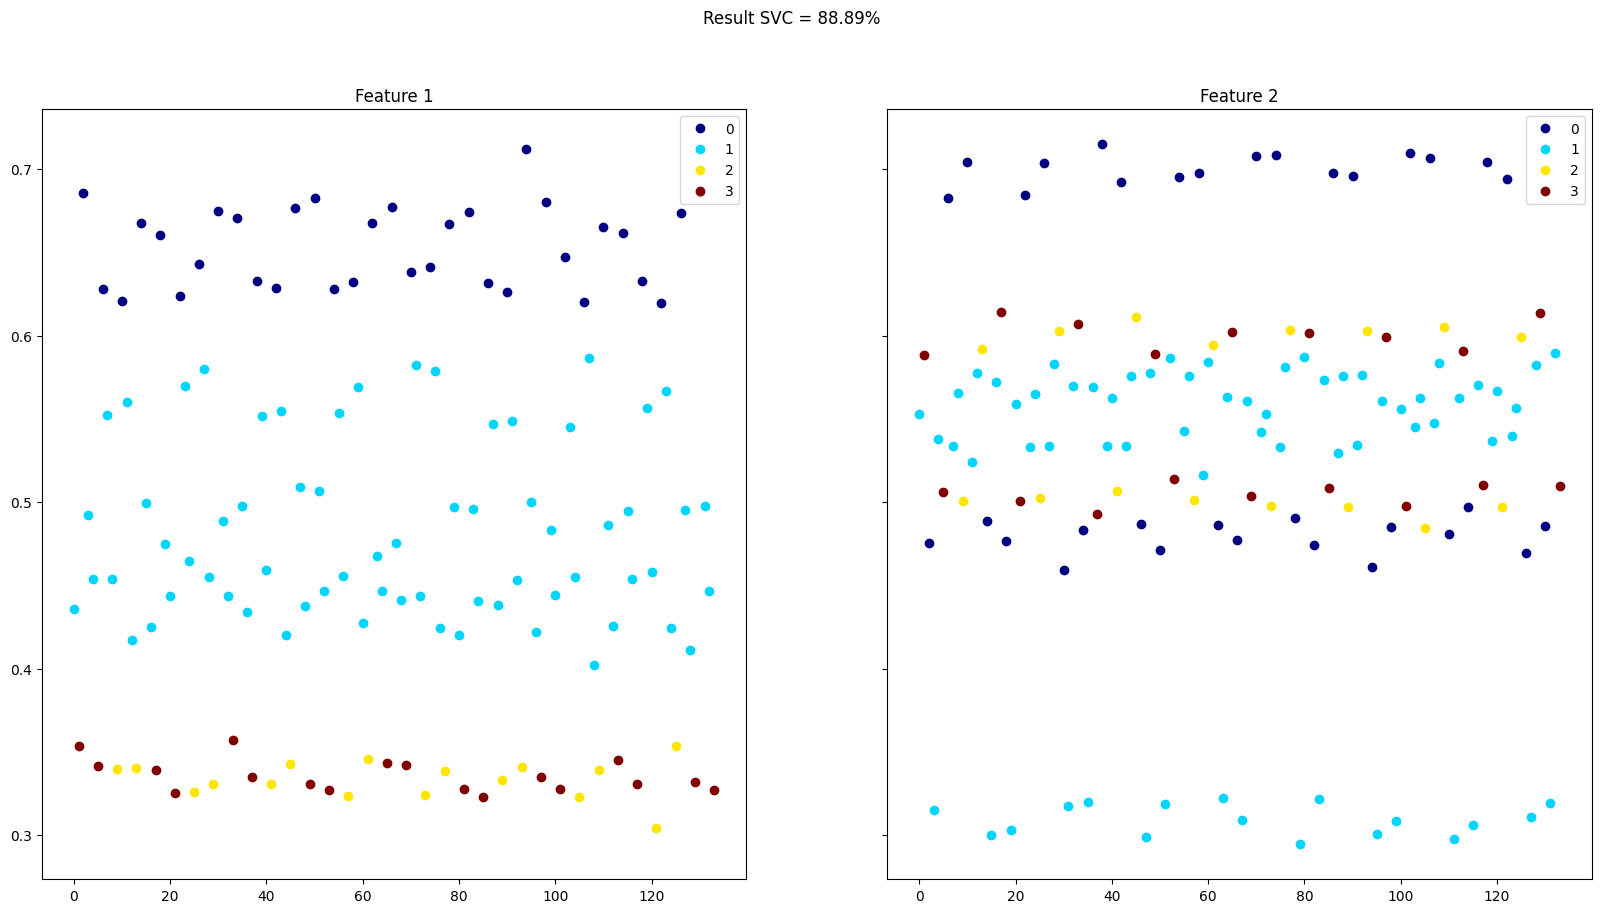

In [27]:
res = reservoirs
model = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='linear'))
expr = Experiment(reservoir=res[2], model=model)
expr.run(timeseries, shots=SHOTS, warmup=25)
score = expr.get_score()
print(f'Result SVC = {round(100*score, 2)}%')

fig, ax = expr.get_feature_plot()
score = f'Result SVC = {round(100*score, 2)}%'
fig.suptitle(score)
print(f'Predictions made by model: {expr.get_predictions()}')
plt.show()

In [6]:
import numpy as np
a = [[1, 2, 3, 4], [4, 3, 2, 1]]

print(np.average(a, axis=0))

[2.5 2.5 2.5 2.5]
